# 3 - Advanced - Explore Repair and Reuse

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'Tutorial_3')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial_3


In [2]:
import PV_ICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Parameters for plots.
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [4]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Working on a  Windows 10
Python version  3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.1.0
PV_ICE version  v0.2.0+549.g4b030a0.dirty


## REPAIR

In [5]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Repair_0', 
                  massmodulefile=r'baseline_modules_mass_US.csv', 
                  energymodulefile=r'baseline_modules_energy.csv', )
r1.scenario['Repair_0'].addMaterial('glass', 
                                    massmatfile=r'..\..\baselines\baseline_material_mass_glass.csv', 
                                    energymatfile=r'..\..\baselines\baseline_material_energy_glass.csv')

r1.scenario['Repair_0'].addMaterial('silicon', 
                                    massmatfile=r'..\..\baselines\baseline_material_mass_silicon.csv',
                                    energymatfile=r'..\..\baselines\baseline_material_energy_silicon.csv')
    
r1.createScenario(name='Repair_50', 
                  massmodulefile=r'..\..\baselines\baseline_modules_mass_US.csv', 
                  energymodulefile=r'..\..\baselines\baseline_modules_energy.csv', )
r1.scenario['Repair_50'].addMaterial('glass', 
                                     massmatfile=r'..\..\baselines\baseline_material_mass_glass.csv',
                                     energymatfile=r'..\..\baselines\baseline_material_energy_glass.csv')
r1.scenario['Repair_50'].addMaterial('silicon', 
                                     massmatfile=r'..\..\baselines\baseline_material_mass_silicon.csv', 
                                     energymatfile=r'..\..\baselines\baseline_material_energy_silicon.csv')

path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial_3
Baseline folder directed to default:  C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines


In [6]:
r1.scenario['Repair_0'].dataIn_m['mod_Repair'] = 0
r1.scenario['Repair_50'].dataIn_m['mod_Repair'] = 50

r1.scenario['Repair_0'].dataIn_m['mod_reliability_t50'] = 25
r1.scenario['Repair_0'].dataIn_m['mod_reliability_t90'] = 35
r1.scenario['Repair_50'].dataIn_m['mod_reliability_t50'] = 25
r1.scenario['Repair_50'].dataIn_m['mod_reliability_t90'] = 35

# Setting Project Lifetime beyond Failures
r1.scenario['Repair_0'].dataIn_m['mod_lifetime'] = 50
r1.scenario['Repair_50'].dataIn_m['mod_lifetime'] = 50

In [27]:
r1.calculateMassFlow(debugflag=True) # Turning debug flag to True to explore internal yearly effects later on.
r1.calculateEnergyFlow(insolation=4800) # Modify to European value here. 4800 is for US NSRDB Average.

>>>> Calculating Material Flows <<<<

Working on Scenario:  Repair_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  Repair_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


>>>> Calculating Energy Flows <<<<

Working on Scenario:  Repair_0
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon
Working on Scenario:  Repair_50
********************
==> Working on Energy for Material :  glass
==> Working on Energy for Material :  silicon


<b> Examples of accessing the dataframes/printing hte keywords: </b>
(we don't have energy now)
* r1.scenario['Repair_0'].dataOut_m.keys()
* r1.scenario['Repair_0'].dataIn_m.keys()
* r1.scenario['Repair_0'].dataOut_e.keys()
* r1.scenario['Repair_0'].material['glass'].matdataIn_m.keys()
* r1.scenario['Repair_0'].material['glass'].matdataOut_m.keys()
* r1.scenario['Repair_0'].material['glass'].matdataOut_e.keys()

In [28]:
USyearly, UScum = r1.aggregateResults()
USyearly.to_csv('USYearly.csv')
UScum.to_csv('USCum.csv')

In [29]:
r1.saveSimulation()

:) Saved Input and Output Dataframes


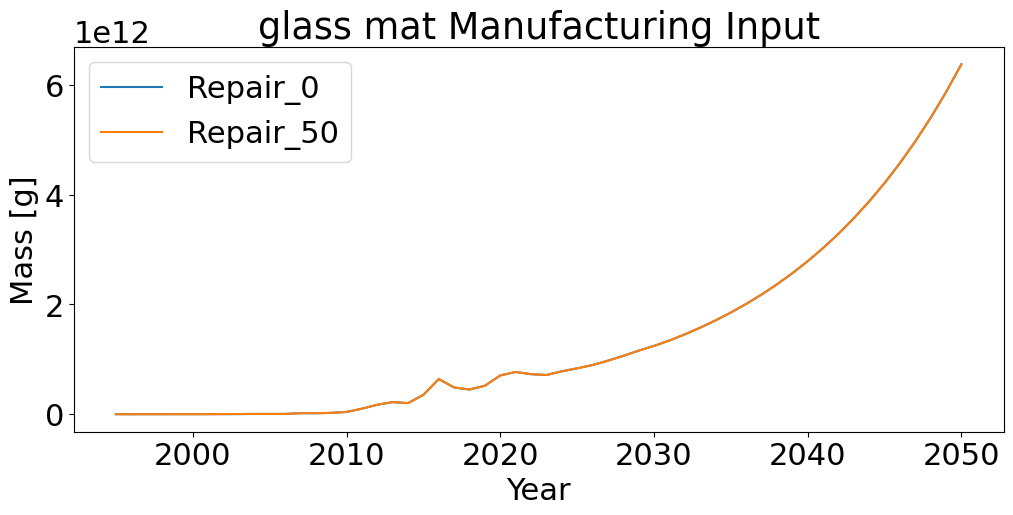

In [30]:
r1.plotMaterialComparisonAcrossScenarios(keyword='mat_Manufacturing_Input', material='glass')

## Plotting

In [31]:
AREA = r1.scenario['Repair_0'].dataOut_m['Area'].iloc[0]

In [44]:
filter_col = [col for col in r1.scenario['Repair_0'].dataDebug_m if 'EOL_L0' in col]

In [47]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r1.scenario['Repair_0'].dataDebug_m[filter_col[life]].iloc[0]
    foo2 += r1.scenario['Repair_50'].dataDebug_m[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

(0.0, 45.0)

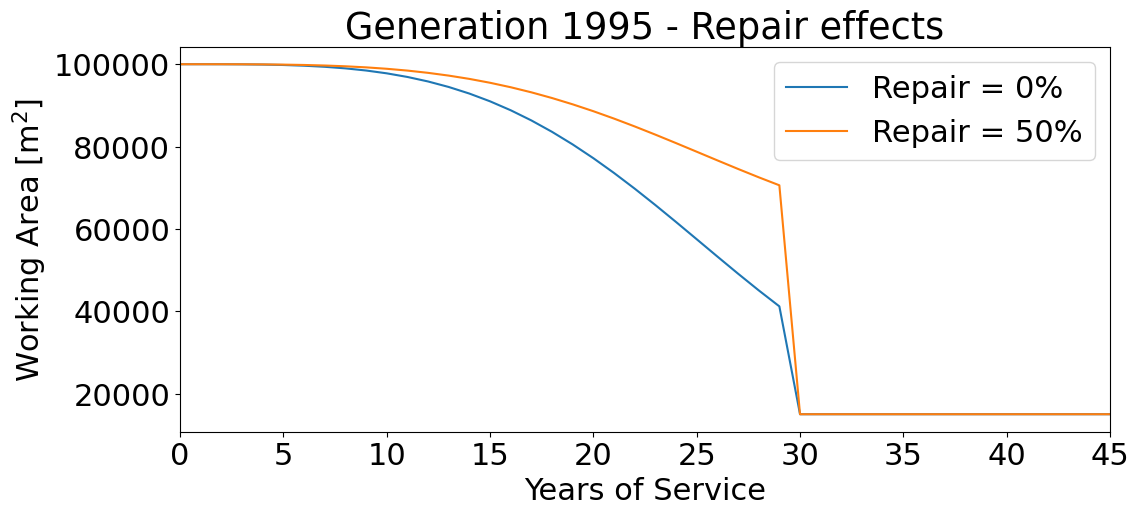

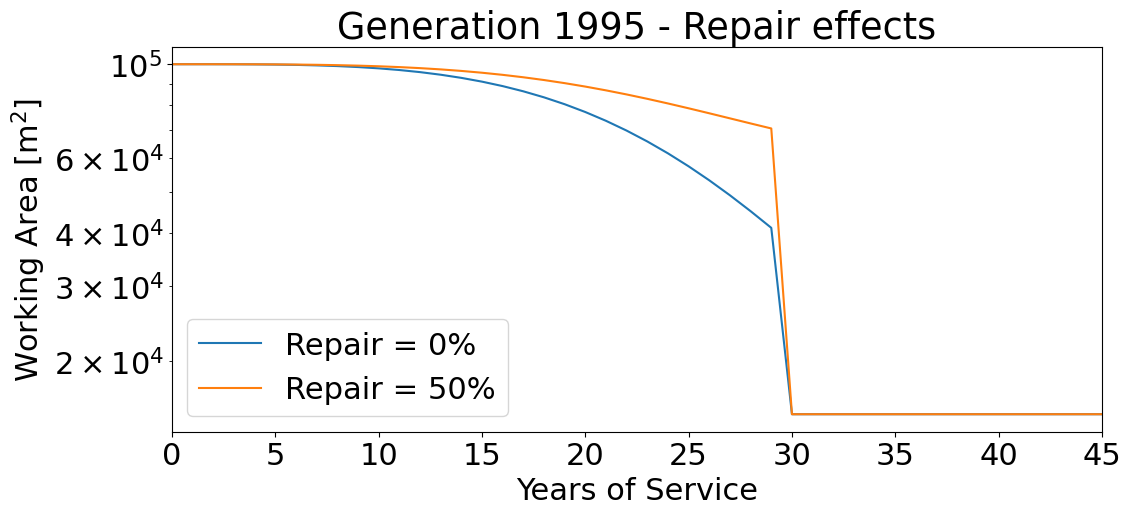

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 50%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 50%')
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

(0.0, 45.0)

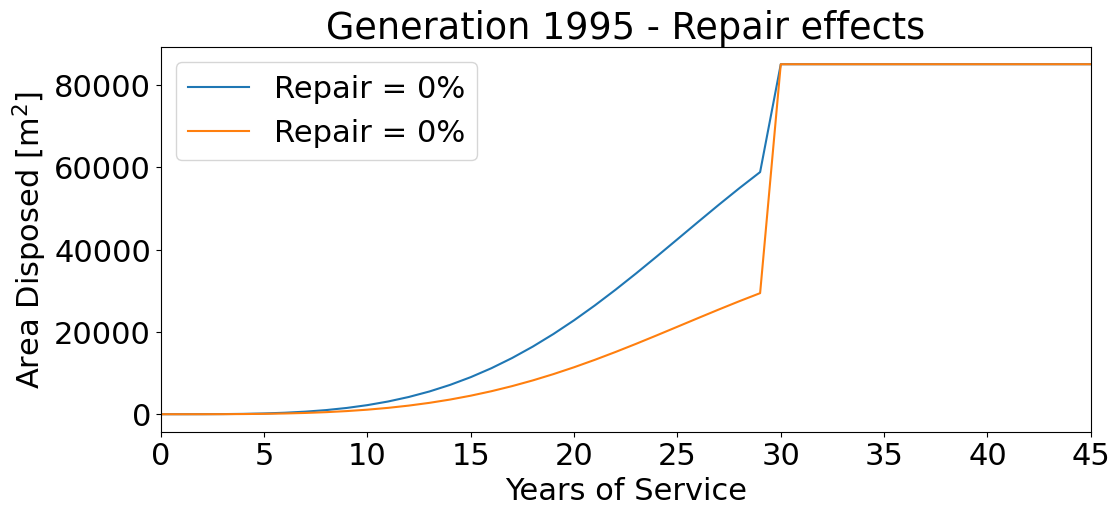

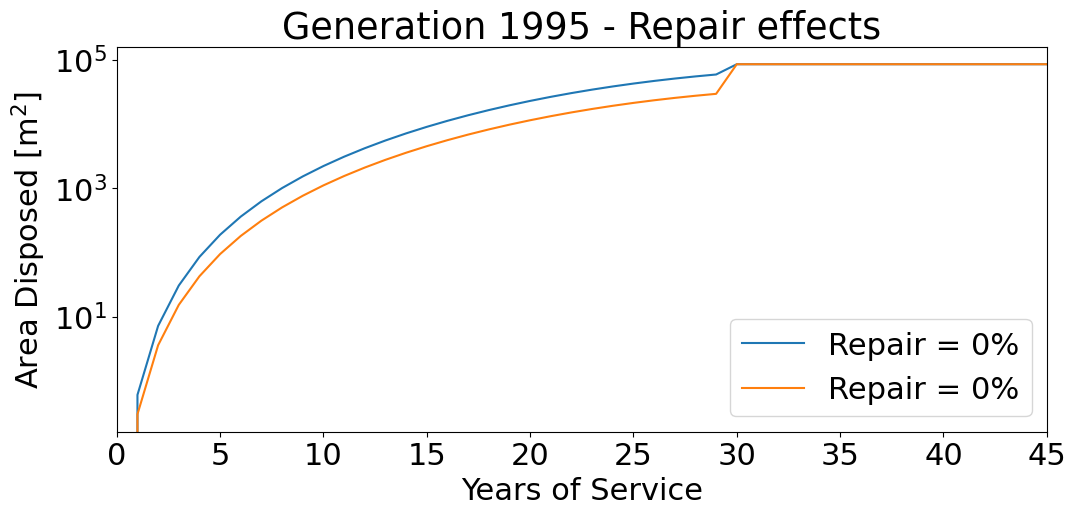

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Repair = 0%')
plt.plot(Cumul_EOL_R50, label='Repair = 0%')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Repair = 0%')
plt.plot(Cumul_EOL_R50, label='Repair = 0%')
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])


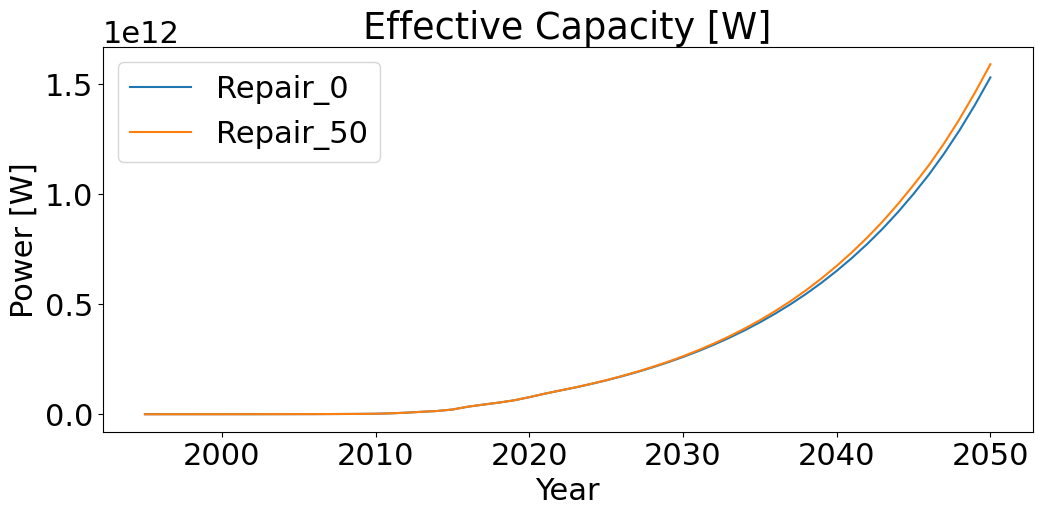

In [54]:
r1.plotScenariosComparison('Effective_Capacity_[W]')

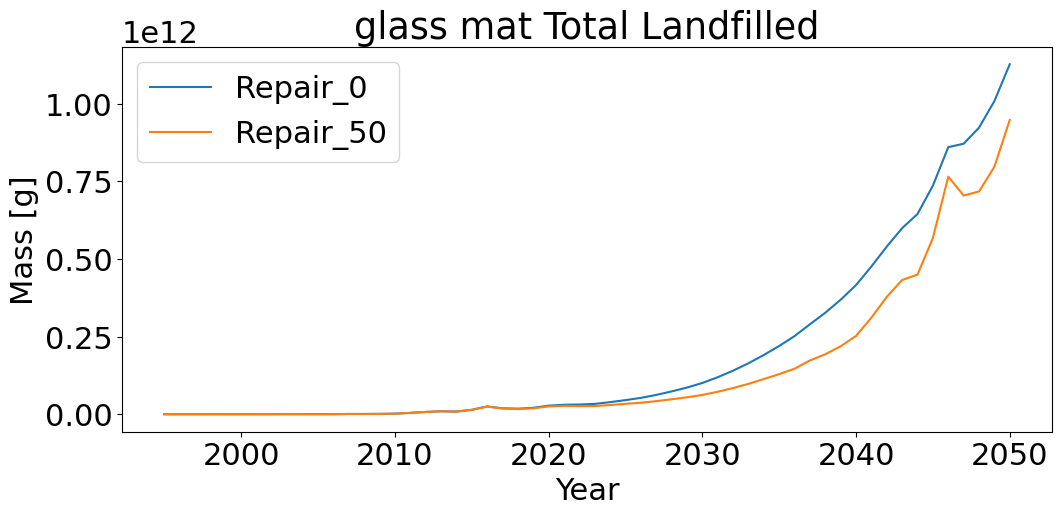

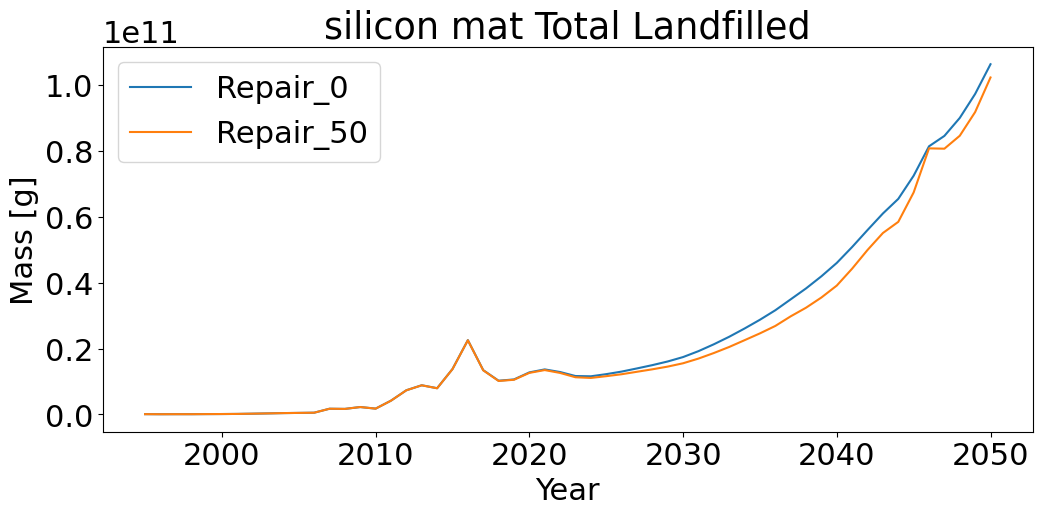

In [55]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

## Reuse

Starting a Clean simulation

In [60]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Reuse_0', massmodulefile=r'baseline_modules_mass_US.csv')
r1.scenario['Reuse_0'].addMaterial('glass', massmatfile=r'..\..\baselines\baseline_material_mass_glass.csv')
r1.scenario['Reuse_0'].addMaterial('silicon', massmatfile=r'..\..\baselines\baseline_material_mass_silicon.csv')

r1.createScenario(name='Reuse_50', massmodulefile=r'baseline_modules_mass_US.csv')
r1.scenario['Reuse_50'].addMaterial('glass', massmatfile=r'..\..\baselines\baseline_material_mass_glass.csv')
r1.scenario['Reuse_50'].addMaterial('silicon', massmatfile=r'..\..\baselines\baseline_material_mass_silicon.csv')

path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Tutorial_3
Baseline folder directed to default:  C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\baselines
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']
No energy module file passed. If desired, pass one of the following options:  ['baseline_modules_energy.csv']


In [73]:
r1.scenario['Reuse_0'].dataIn_m.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff',
       'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored',
       'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield',
       'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill',
       'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled',
       'mod_Reuse'],
      dtype='object')

In [74]:
r1.scenario['Reuse_0'].dataIn_m['mod_Reuse'] = 0
r1.scenario['Reuse_50'].dataIn_m['mod_EOL_pg0_resell'] = 50

r1.scenario['Reuse_0'].dataIn_m['mod_reliability_t50'] = 35
r1.scenario['Reuse_0'].dataIn_m['mod_reliability_t90'] = 45
r1.scenario['Reuse_50'].dataIn_m['mod_reliability_t50'] = 35
r1.scenario['Reuse_50'].dataIn_m['mod_reliability_t90'] = 45

# Setting Project Lifetime beyond Failures
r1.scenario['Reuse_0'].dataIn_m['mod_lifetime'] = 25
r1.scenario['Reuse_50'].dataIn_m['mod_lifetime'] = 25

In [75]:
r1.calculateMassFlow(debugflag=True)

>>>> Calculating Material Flows <<<<

Working on Scenario:  Reuse_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  Reuse_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


In [76]:
AREA = r1.scenario['Reuse_50'].dataOut_m['Area'].iloc[0]

In [77]:
filter_col = [col for col in r1.scenario['Reuse_50'].dataDebug_m if 'EOL_L0' in col]

In [78]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r1.scenario['Reuse_0'].dataDebug_m[filter_col[life]].iloc[0]
    foo2 += r1.scenario['Reuse_50'].dataDebug_m[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

(0.0, 45.0)

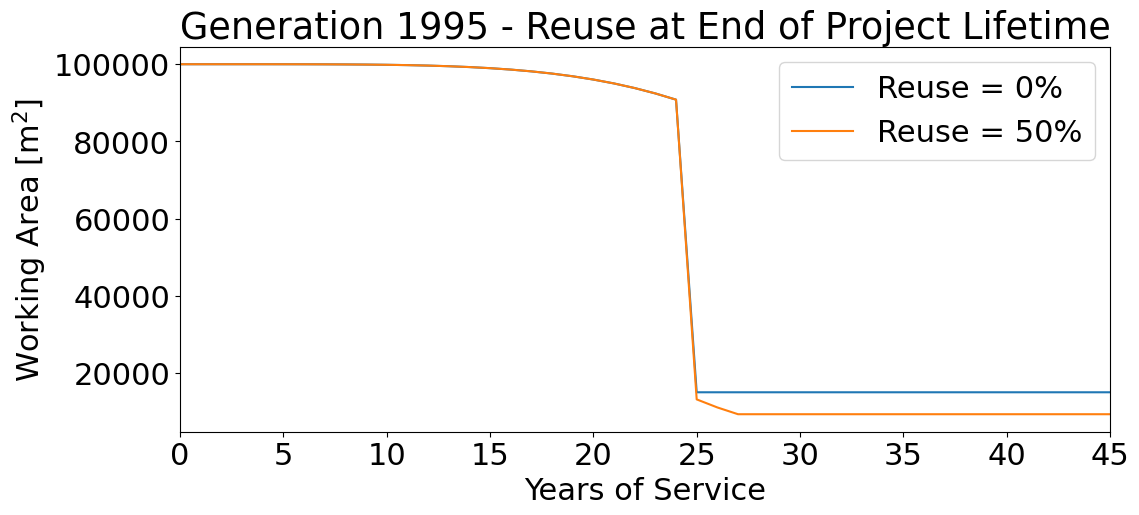

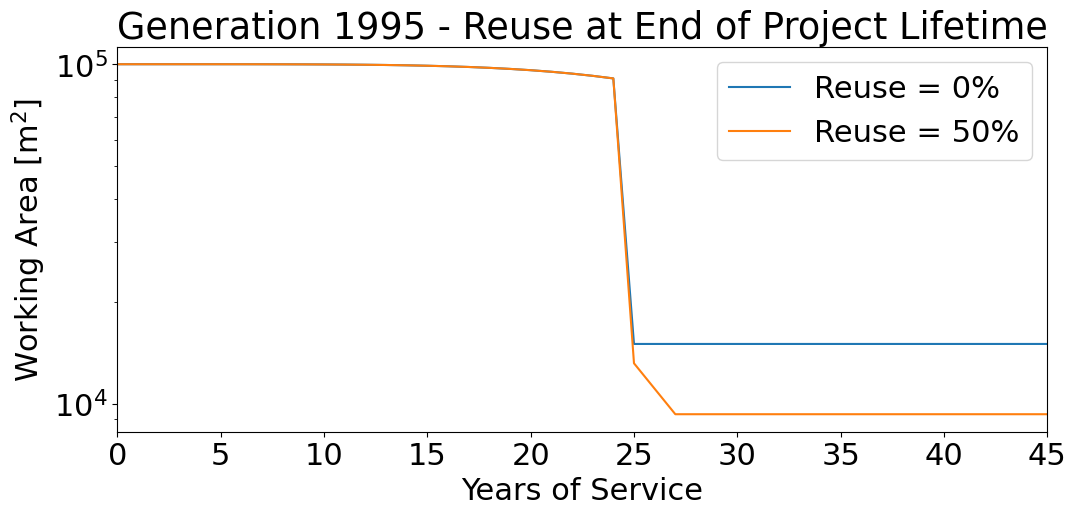

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.legend()
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.xlim([0,45])

(0.0, 45.0)

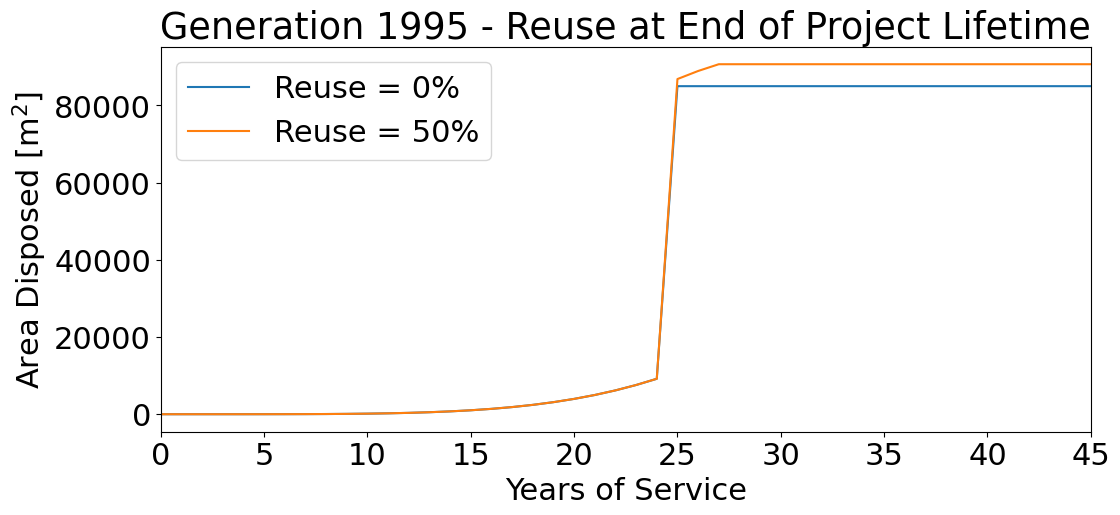

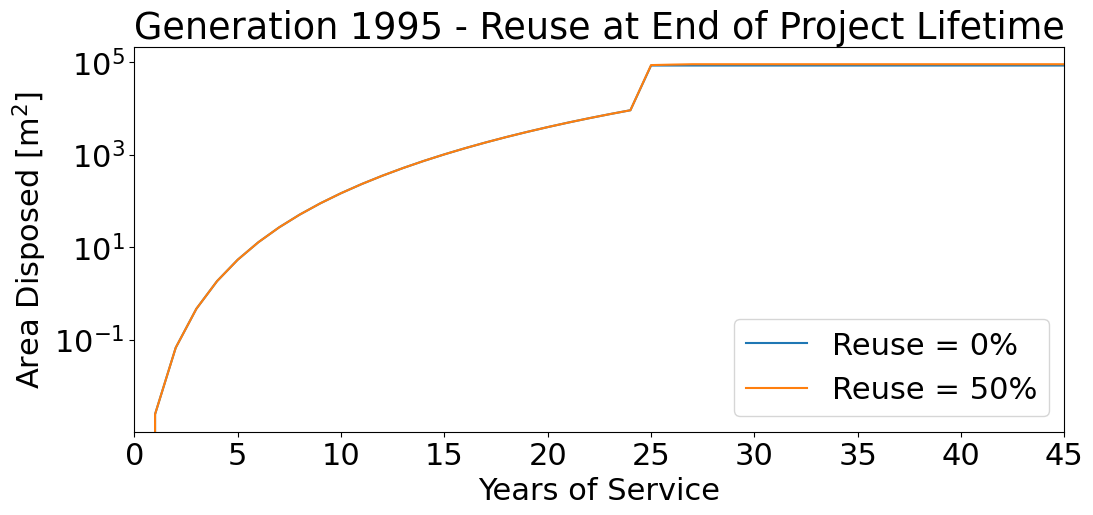

In [81]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

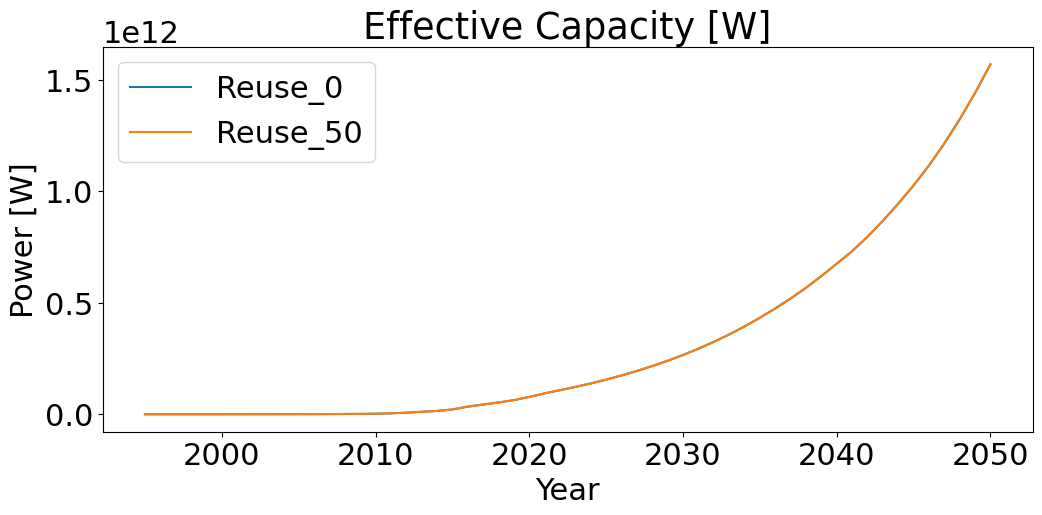

In [83]:
r1.plotScenariosComparison(keyword='Effective_Capacity_[W]')